# 机器学习练习 6 - 支持向量机

本章代码涵盖了基于Python的解决方案，用于Coursera机器学习课程的第六个编程练习。 请参考[练习文本](ex6.pdf)了解详细的说明和公式。


在本练习中，我们将使用支持向量机（SVM）来构建垃圾邮件分类器。 我们将从一些简单的2D数据集开始使用SVM来查看它们的工作原理。 然后，我们将对一组原始电子邮件进行一些预处理工作，并使用SVM在处理的电子邮件上构建分类器，以确定它们是否为垃圾邮件。

我们要做的第一件事是看一个简单的二维数据集，看看线性SVM如何对数据集进行不同的C值（类似于线性/逻辑回归中的正则化项）。 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

raw_data = loadmat('data/ex6data1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

我们将其用散点图表示，其中类标签由符号表示（+表示正类，o表示负类）。

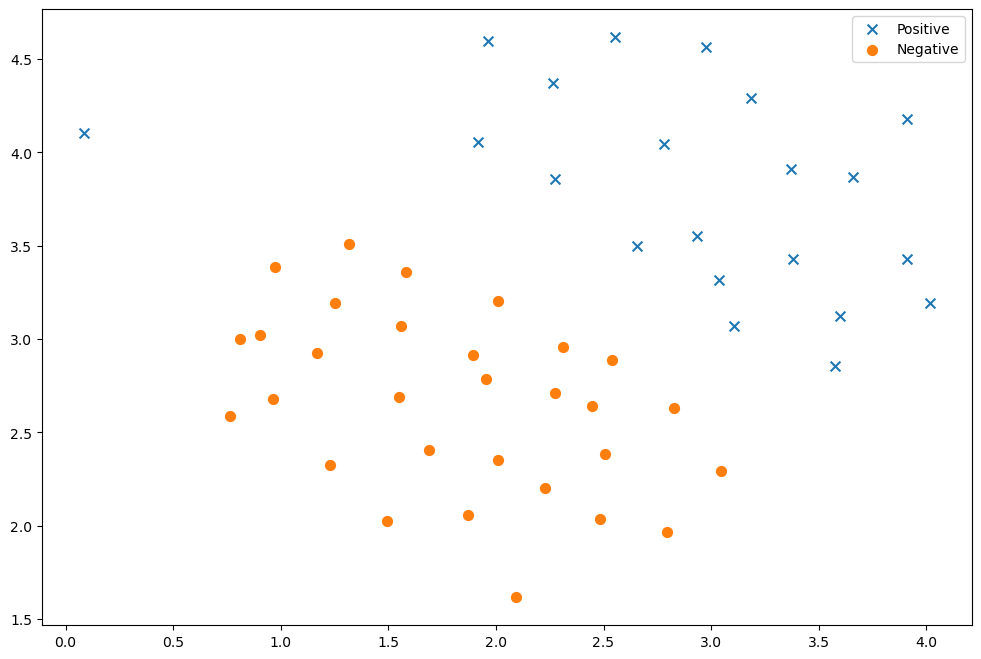

In [2]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

请注意，还有一个异常的正例在其他样本之外。
这些类仍然是线性分离的，但它非常紧凑。 我们要训练线性支持向量机来学习类边界。 在这个练习中，我们没有从头开始执行SVM的任务，所以我要用scikit-learn。

In [3]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
# C参数是正则化强度的倒数，它控制了模型的复杂度。较大的C值允许更多的错误分类（松弛变量较大），使得模型更加复杂，倾向于拟合数据噪声；较小的C值则使模型更简单，对错误分类惩罚更大。在这里设置为1，是一个常用的默认值，平衡了误分类和模型复杂度。
# loss参数定义了损失函数。在LinearSVC中，hinge损失是最常见的选择，它定义为最大边界距离的1-余弦相似度。这个损失函数鼓励模型找到最大间隔的决策边界。不同于上述信息中的默认squared_hinge损失，这里直接使用的是原始的hinge损失函数，这可能会导致优化过程不是那么稳定，但通常在实践中也能得到不错的结果。
# max_iter参数指定了迭代次数的上限。在训练过程中，LinearSVC会进行迭代直到收敛或达到最大迭代次数。设置max_iter为1000意味着算法将最多执行1000次迭代来找到最优解。

svc

LinearSVC(C=1, loss='hinge')

首先，我们使用 C=1 看下结果如何。

In [4]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

/root/miniconda3/envs/lanqiao-ai-py38/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/root/miniconda3/envs/lanqiao-ai-py38/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9803921568627451

其次，让我们看看如果C的值越大，会发生什么

In [5]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

/root/miniconda3/envs/lanqiao-ai-py38/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/root/miniconda3/envs/lanqiao-ai-py38/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9411764705882353

这次我们得到了训练数据的完美分类，但是通过增加C的值，我们创建了一个不再适合数据的决策边界。 我们可以通过查看每个类别预测的置信水平来看出这一点，这是该点与超平面距离的函数。

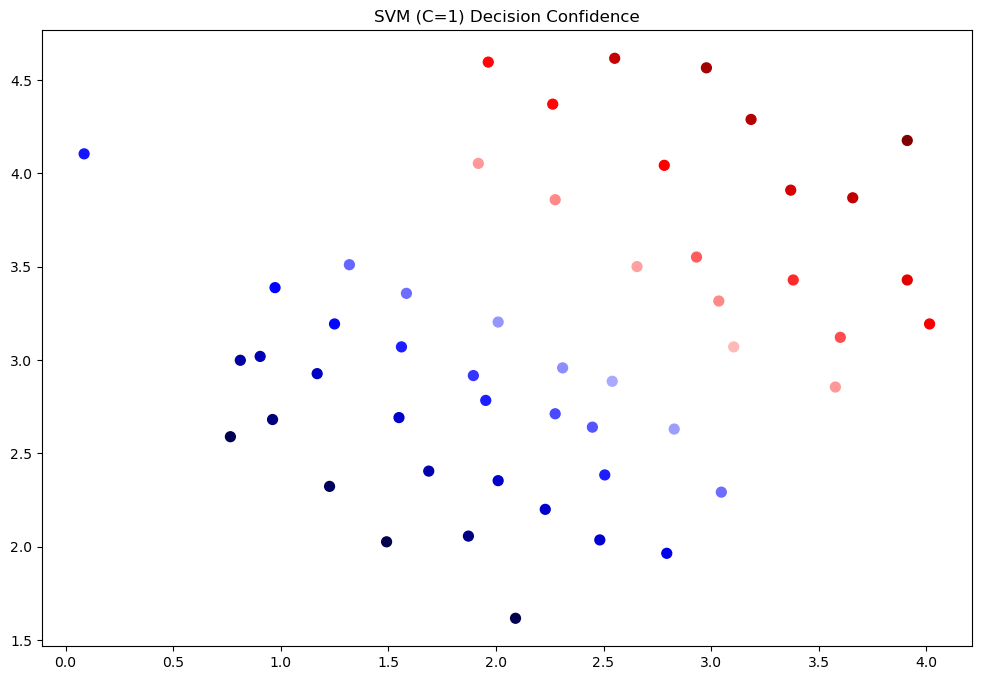

In [6]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])
# svc.decision_function返回一个数组，其中每个元素对应于输入样本的得分。这里的输入是data数据框中名为X1和X2的两列，假设它们是用于训练SVM模型的特征。新列SVM 1 Confidence存储了这些决策函数值，表示模型对每个样本分类的信心程度。

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
# 使用scatter函数绘制散点图，其中X1和X2是x轴和y轴的值，s=50表示点的大小，c=data['SVM 1 Confidence']表示颜色映射到SVM 1 Confidence列的值，cmap='seismic'选择了'seismic'颜色映射，这是一种从红色到蓝色的颜色渐变，用于突出表示负值和正值。

ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

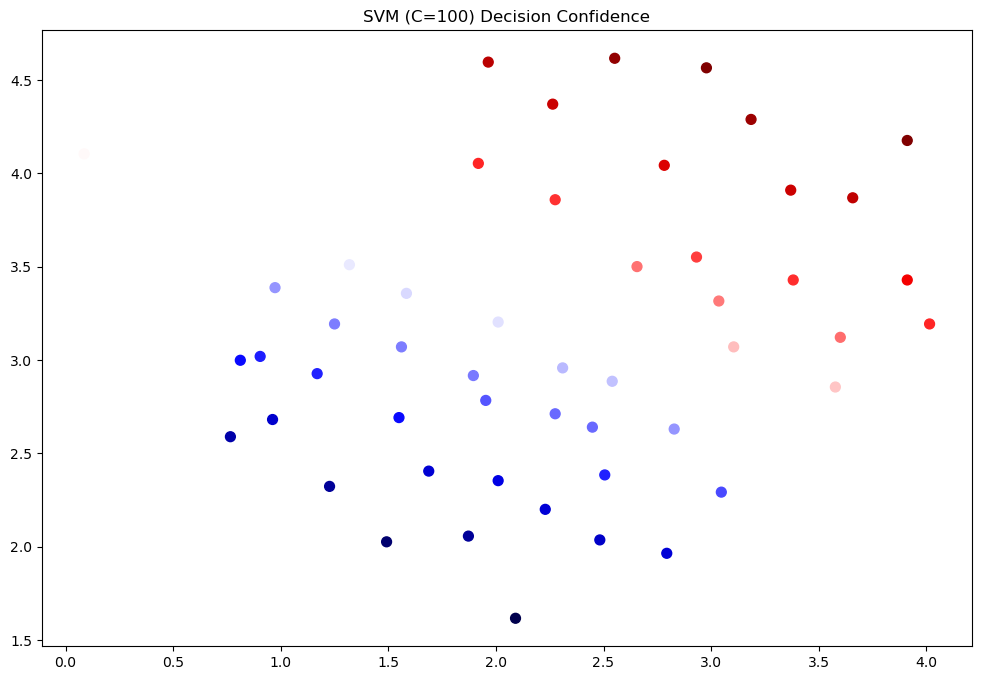

In [7]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()


现在我们将从线性SVM转移到能够使用内核进行非线性分类的SVM。 我们首先负责实现一个高斯核函数。 虽然scikit-learn具有内置的高斯内核，但为了实现更清楚，我们将从头开始实现。

高斯核广泛应用于机器学习中，特别是在支持向量机（SVM）、核主成分分析（Kernel PCA）等算法中，用于将数据从原始特征空间映射到一个更高维的空间，使得原本线性不可分的数据变得线性可分。

高斯核函数（Gaussian kernel function）数学公式表示：

$$ k(x, x') = \exp\left(-\frac{|x - x'|^2}{2\sigma^2}\right) $$

In [8]:
# x1, x2: 这两个参数分别代表两个输入向量（样本），在数学表达式中通常表示为从原始空间到高维特征空间的输入点。在实际应用中，它们可以是任意维度的向量，比如在图像识别中可以是像素特征向量。

# sigma: 这是高斯核的一个关键参数，表示标准差或宽度因子。较大的sigma值会导致较宽的高斯分布，使得更多的点受到相邻点的影响，从而在高维空间中产生更平滑的决策边界；相反，较小的sigma值会产生更尖锐的决策边界。选择合适的sigma对于模型的性能至关重要。
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))
# 高斯核函数本质上是指数函数的一个形式，其作用是生成一个随着输入向量间距离增大而指数衰减的值，体现了“距离越近相似度越高”的原则。

In [9]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

该结果与练习中的预期值相符。 接下来，我们将检查另一个数据集，这次用非线性决策边界。

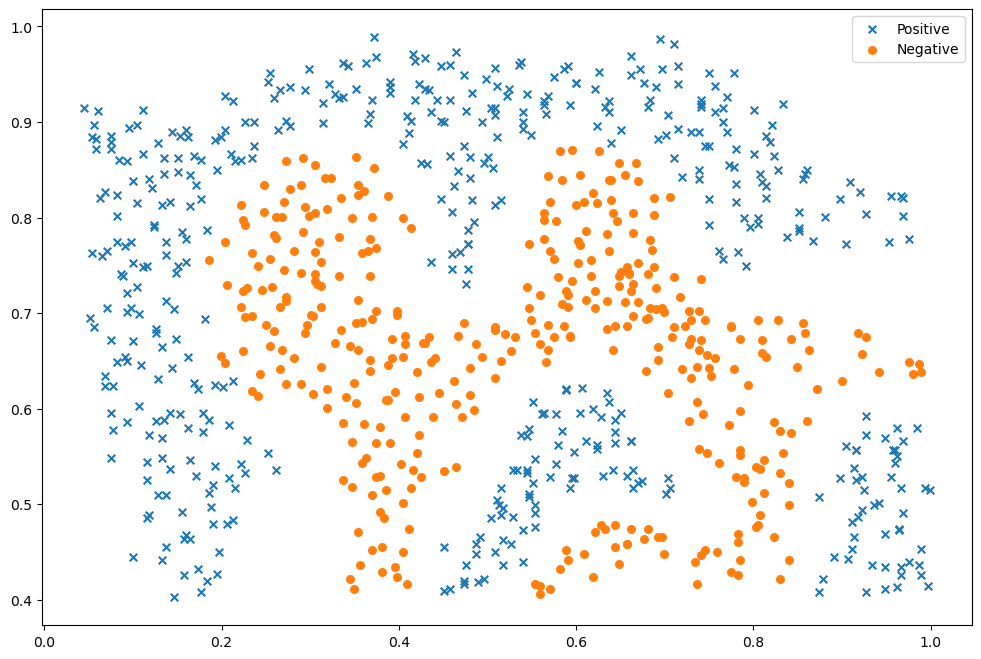

In [11]:
raw_data = loadmat('data/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

对于该数据集，我们将使用内置的RBF内核构建支持向量机分类器，并检查其对训练数据的准确性。 为了可视化决策边界，这一次我们将根据实例具有负类标签的预测概率来对点做阴影。 从结果可以看出，它们大部分是正确的。

RBF 是 "Radial Basis Function"（径向基函数）的缩写，是一种常用的数据处理和建模技术，在机器学习领域尤为重要。在支持向量机（SVM）的上下文中，RBF 是一种核函数（kernel function），用于将输入数据从原始特征空间映射到一个更高维度的特征空间，使得原本线性不可分的问题转化为线性可分问题。

RBF 核函数的基本形式可以表示为：

$$ K(x, x') = \exp\left(-\gamma ||x - x'||^2\right) $$

其中：

$ K(x, x') $ 是两个数据点 $ x $ 和 $ x' $ 通过 RBF 函数映射后的内积，反映了它们在高维特征空间中的相似度。

$ \gamma $ 是 RBF 核的一个重要参数，称为“宽度”或“尺度参数”，控制了函数的扩散程度。较小的 $ \gamma $ 值会导致较宽的 bell-shaped（钟形）曲线，使得远处的数据点对彼此的影响较大；较大的 $ \gamma $ 则产生较窄的曲线，只有邻近的数据点才会有显著的影响。

$ ||x - x'||^2 $ 是两点间欧氏距离的平方，衡量了它们在原始特征空间中的接近程度。

现使用内置的 RBF 内核构建支持向量机分类器来处理某个数据集。通过检查模型在训练数据上的准确性，并通过着色（可能是以不同的透明度或色调）来视觉展示实例根据其被预测为负类的概率，可以观察到模型的决策边界及分类效果。如果大部分点的预测概率正确，意味着模型在训练数据上的表现良好，能够有效地划分不同类别的区域。然而，需要注意的是，仅凭训练数据上的表现不能完全评估模型的泛化能力，还需要通过交叉验证或在独立的测试集上评估来确保模型不是过拟合的。

In [12]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [13]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

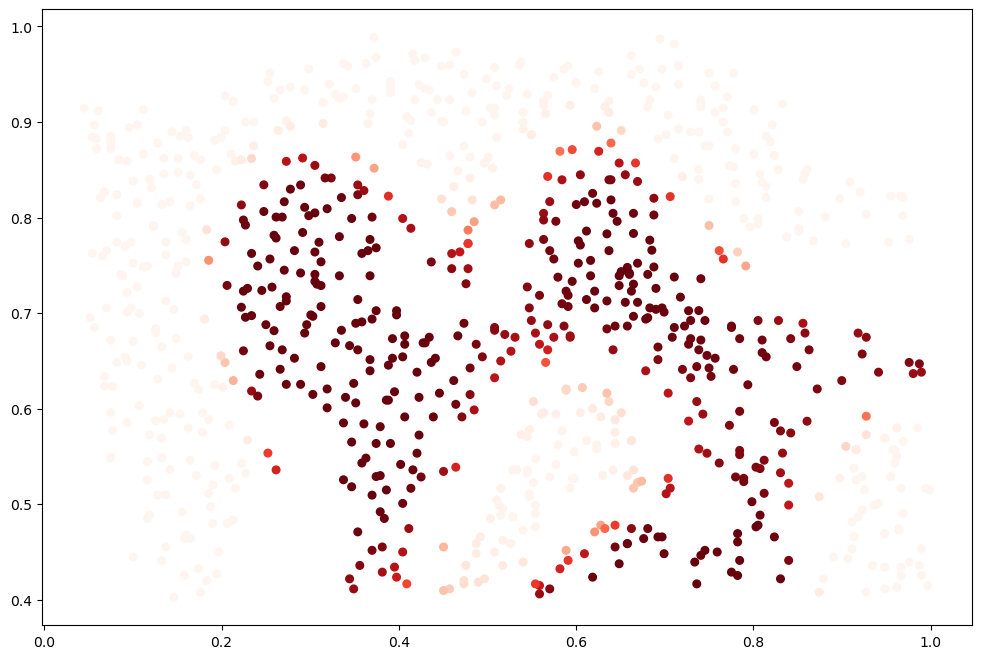

In [14]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]
# 调用predict_proba方法，该方法返回一个二维数组，其中每一行对应一个样本，每一列对应一个类别的预测概率。假设这是一个二分类问题，输出的数组将有两列，分别对应负类和正类的概率。
# [:,0]：通过切片操作选取数组中所有行的第一列，也就是每个样本被预测为负类的概率。

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

对于第三个数据集，我们给出了训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。 虽然我们可以使用scikit-learn的内置网格搜索来做到这一点，但是本着遵循练习的目的，我们将从头开始实现一个简单的网格搜索。

In [15]:
raw_data = loadmat('data/ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
# 定义了两个列表，分别包含多个可能的C和gamma值，这些值将用于遍历并评估SVM模型。

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

现在，我们将进行第二部分的练习。 在这一部分中，我们的目标是使用SVM来构建垃圾邮件过滤器。 在练习文本中，有一个任务涉及一些文本预处理，以获得适合SVM处理的格式的数据。 然而，这个任务很简单（将字词映射到为练习提供的字典中的ID），而其余的预处理步骤（如HTML删除，词干，标准化等）已经完成。 我将跳过机器学习任务，而不是重现这些预处理步骤，其中包括从预处理过的训练集构建分类器，以及将垃圾邮件和非垃圾邮件转换为单词出现次数的向量的测试数据集。

In [16]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [17]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

每个文档已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示文档中是否存在单词。 在这一点上，训练评估是用一个分类器拟合测试数据的问题。

In [18]:
svc = svm.SVC()
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 99.32%


In [19]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy = 98.7%


这个结果是使用使用默认参数的。 我们可能会使用一些参数调整来获得更高的精度，尽管95％的精度相当不错。

结束练习6！ 在下一个练习中，我们将使用K-Means和主成分分析进行聚类和图像压缩。